In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,5)


In [27]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   consistency_score            1000 non-null   float64
 10  risk_level                   1000 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [16]:
df.describe()

,math score,reading score,writing score,average_score,consistency_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667,5.159705
std,15.16308,14.600192,15.195657,14.257326,2.806121
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.333333,3.055050
50%,66.00000,70.000000,69.000000,68.333333,4.725816
75%,77.00000,79.000000,79.000000,77.666667,7.000000
max,100.00000,100.000000,100.000000,100.000000,15.373137


In [ ]:
subjects = ["math score", "reading score", "writing score"]



['math score', 'reading score', 'writing score']

In [18]:
df["average_score"] = df[subjects].mean(axis=1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,consistency_score,risk_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1.154701,Low Risk
1,female,group C,some college,standard,completed,69,90,88,82.333333,11.590226,Low Risk
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2.516611,Low Risk
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,6.806859,Medium Risk
4,male,group C,some college,standard,none,76,78,75,76.333333,1.527525,Low Risk


In [ ]:
difficulty_index = df[subjects].mean().sort_values()
difficulty_index



math score       66.089
writing score    68.054
reading score    69.169
dtype: float64

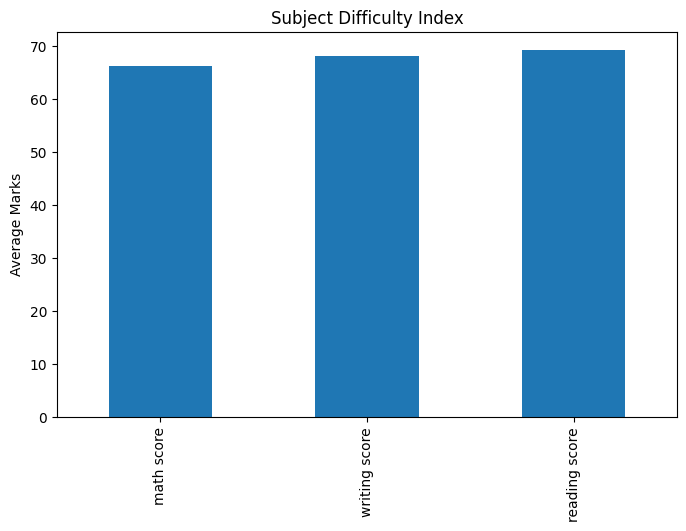

In [20]:
difficulty_index.plot(kind="bar", title="Subject Difficulty Index")
plt.ylabel("Average Marks")
plt.show()


In [21]:
df["consistency_score"] = df[subjects].std(axis=1)
df[["average_score", "consistency_score"]].head()


,average_score,consistency_score
0,72.666667,1.154701
1,82.333333,11.590226
2,92.666667,2.516611
3,49.333333,6.806859
4,76.333333,1.527525


In [22]:
def risk_level(avg):
    if avg < 40:
        return "High Risk"
    elif avg < 60:
        return "Medium Risk"
    else:
        return "Low Risk"

df["risk_level"] = df["average_score"].apply(risk_level)
df["risk_level"].value_counts()


risk_level
Low Risk       715
Medium Risk    255
High Risk       30
Name: count, dtype: int64

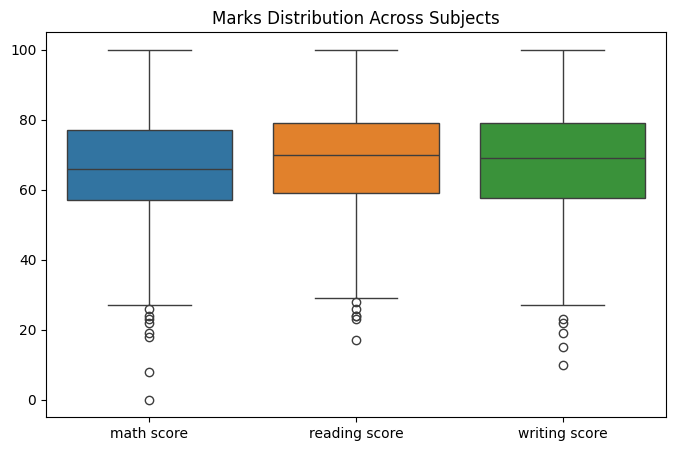

In [23]:
sns.boxplot(data=df[subjects])
plt.title("Marks Distribution Across Subjects")
plt.show()


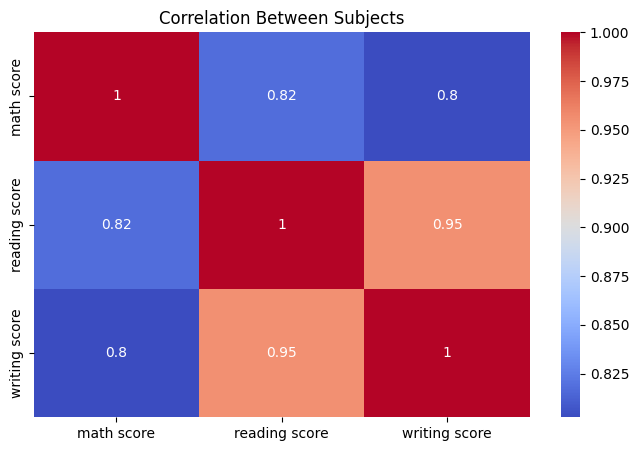

In [24]:
sns.heatmap(df[subjects].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Subjects")
plt.show()


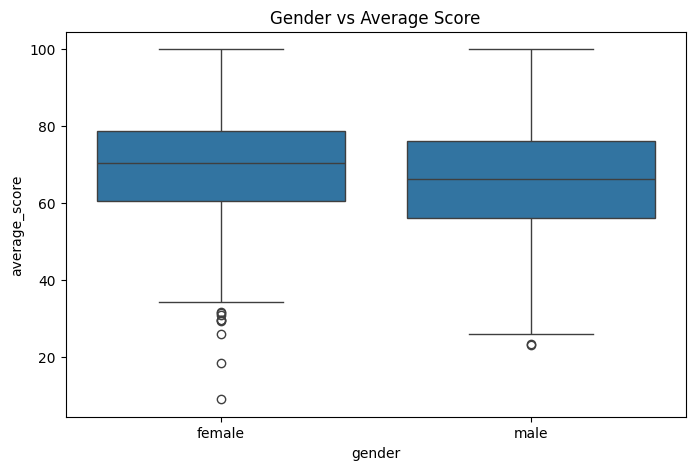

In [25]:
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Gender vs Average Score")
plt.show()


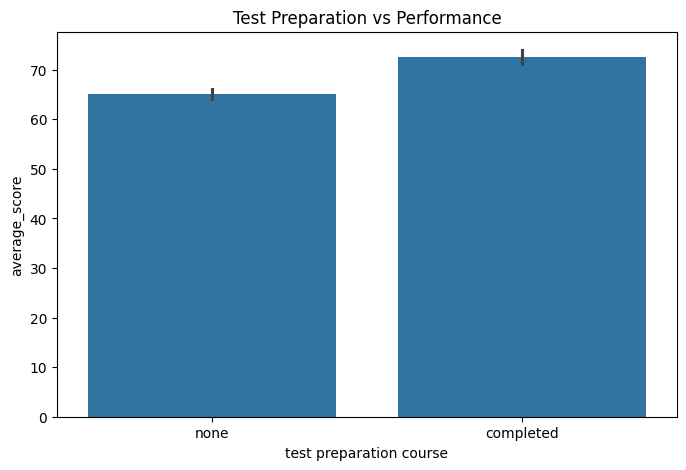

In [26]:
sns.barplot(x="test preparation course", y="average_score", data=df)
plt.title("Test Preparation vs Performance")
plt.show()
